In [3]:
from audioFunctions import *
from binaryFunctions import *
from qam import *
from sequenceGenerators import *
from receiver import *
from to_import import *

In [4]:
def str_to_bytearray(string_data):
    new_data = []
    for i in range(0, len(string_data), 8):
        new_data.append(string_data[i:i+8])  

    int_data = [] 
    for i in new_data:
        int_data.append(int(i,2))

    return bytearray(int_data)

In [5]:
# So far this works the best at estimating the location... 
chirp_signal = Chirp(100,8000,1, volume = 100)
print(len(chirp_signal))

48000


In [6]:
y = audioDataFromFile('Data_Files/a7r56tu_received.wav')

In [7]:
y_section = np.reshape(y, y.size)[0:200000]
g = np.convolve(y_section, chirp_signal[::-1], 'valid') # convoluton
i_max = np.argmax(g[:int(len(g)/2)])


1
109928


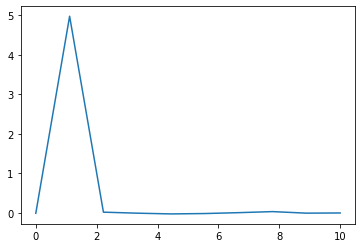

In [11]:
y_confirm = y[i_max+ len(chirp_signal):]

corr = np.correlate(y_confirm[:5000], known_time, mode = 'valid')
plot_y(corr[:10])
print(np.argmax(corr))

shift = np.argmax(corr)

y_dash = y[i_max + len(chirp_signal)+4096+shift:]
print(i_max + len(chirp_signal)+4096+shift)

In [18]:
d = len(y_dash)/4096

chunks = []
for i in range(int(d)):
    chunks.append(y_dash[i*4096:(i+1)*4096])

10000000
4094


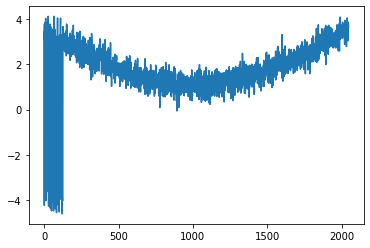

In [19]:
# FIRST ROUND
binary = []
for i in range(1):  #len(chunks)):
    fft_data = fft(chunks[i])[1:2048]
    
    plot_y(fft_data.imag, f = i)
    #plot_y(chunks[i][1:2048], f = i)
    
    for freq_bin in fft_data:
        
        #print(freq_bin)

        bit0 = 0
        bit1 = 0

        if freq_bin.real < 0:
            bit1 = 1
        if freq_bin.imag < 0:
            bit0 = 1

        binary.append(bit0)
        binary.append(bit1)

bin_single_sting = ""
for i in range(len(binary)):
    bin_single_sting += str(binary[i])
    
print(bin_single_sting[8*28:8*29])
str_len = len(bin_single_sting)
print(str_len)
a = fft(chunks[0])[1:]

In [21]:
# Find information about the file name and the byte length of the file
file_seperation = []
count = 0
for i in range(math.floor(len(binary)/8)):
    byte = binary[i*8:(i+1)*8]
    zero = True
    for bit in byte:
        if bit == 1:
            zero = False
            
    if zero:
        #print(byte, "zero")
        file_seperation.append(i*8)
            
        count += 1
    
    if count == 2:
        break
        
print(file_seperation)
# Extract file name and length of the file
Filename= str_to_bytearray(bin_single_sting[0:file_seperation[0]]).decode()
Length = int(str_to_bytearray(bin_single_sting[file_seperation[0]+8:file_seperation[1]]).decode())

extra_bits = len(binary) - file_seperation[1] - 8 - Length*8

raw_file = bin_single_sting[file_seperation[1] + 8 : -1*extra_bits]

print(Filename, Length, extra_bits)

str_to_bytearray(bin_single_sting[0:file_seperation[0]+8*17]).decode()

[88, 152]
a7r56tu.gif 1476376 -11807074


'a7r56tu.gif\x001476376\x00GIF89ar\x02'

In [22]:
loop = math.ceil(Length * (4/2047))
binary_long = []
for i in range(loop):  #len(chunks)):
    if i%100 == 0:
        print(i, " ", end = '')
    fft_data = fft(chunks[i])[1:2048]
    
    
    for j, freq_bin in enumerate(fft_data):

        bit0 = 0
        bit1 = 0

        if freq_bin.real < 0:
            bit1 = 1
        if freq_bin.imag < 0:
            bit0 = 1

        binary_long.append(bit0)
        binary_long.append(bit1)

bin_single_sting_long = ""
for i in range(len(binary_long)):
    bin_single_sting_long += str(binary_long[i])
    
print(bin_single_sting_long[8*28:8*29])
str_len_long = len(bin_single_sting_long)
print(str_len_long)

0  100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  10000000
11811190


In [23]:
# Find information about the file name and the byte length of the file
file_seperation = []
count = 0
for i in range(math.floor(len(binary_long)/8)):
    byte = binary_long[i*8:(i+1)*8]
    zero = True
    for bit in byte:
        if bit == 1:
            zero = False
            
    if zero:
        #print(byte, "zero")
        file_seperation.append(i*8)
            
        count += 1
    
    if count == 2:
        break
        
# Extract file name and length of the file
Filename= str_to_bytearray(bin_single_sting_long[0:file_seperation[0]]).decode()
Length = int(str_to_bytearray(bin_single_sting_long[file_seperation[0]+8:file_seperation[1]]).decode())

extra_bits = len(binary_long) - file_seperation[1] - 8 - Length*8

raw_file = bin_single_sting_long[file_seperation[1] + 8 : -1*extra_bits]

raw_file_length = len(raw_file)
print(Filename, Length, extra_bits, raw_file_length)

a7r56tu.gif 1476376 22 11811008


In [47]:
string_data = raw_file

new_data = []
for i in range(0, len(string_data), 8):
    new_data.append(string_data[i:i+8])  

int_data = [] 
for i in new_data:
    int_data.append(int(i,2))

byte = bytearray(int_data)

In [48]:
newFile = open("Data_Files/key.gif", "wb")
newFile.write(byte)

1476376

In [9]:
with open('Data_Files/a7r56tu_knownseq.csv', 'r') as file:
    raw = file.read().replace('\n', ',').split(',')

known = []
for value in raw:
    try:
        v = float(value)
        if v == 0:
            symbol = cmath.exp((math.pi/4) * 1j)
        elif v ==1:
            symbol = cmath.exp((3*math.pi/4) * 1j)
        elif v == 2:
            symbol = cmath.exp((5*math.pi/4) * 1j)
        else:
            symbol = cmath.exp((7*math.pi/4) * 1j)
        

        known.append(symbol)
    except:
        pass
    
known = np.array(known)

In [10]:
known_fourier = np.concatenate(([0], known, [0], np.conjugate(known[::-1])))
known_time = ifft(known_fourier).real

In [70]:
a = [2,3,4,5]
print(a[1:3])

[3, 4]
